<a href="https://colab.research.google.com/github/Ashishkr108/Learning-Path/blob/main/MNIST_handwritten_digits_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten  
from keras.layers import Convolution2D, MaxPooling2D 

from sklearn.metrics import plot_confusion_matrix

from keras.utils import np_utils

from keras.datasets import mnist

MNIST handwritten digits using CNN

In [2]:
import numpy as np
import cv2
np.random.seed(123) 
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten  
from keras.layers import Convolution2D, MaxPooling2D 

from keras.utils import np_utils

from keras.datasets import mnist 

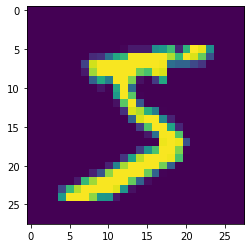

In [25]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
plt.imshow(X_train[0])
plt.show()

In [26]:
X_train[0].shape

(28, 28)

In [27]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
print(X_train.shape,type(X_train),X_train.shape[0])

(60000, 28, 28) <class 'numpy.ndarray'> 60000


In [8]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [9]:
print(X_train.shape,type(X_train),X_train.shape[0])

(60000, 28, 28, 1) <class 'numpy.ndarray'> 60000


In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [12]:
X_train /= 255
X_test /= 255

In [14]:
print(y_train.shape,type(y_train),y_train.shape[0])

(60000,) <class 'numpy.ndarray'> 60000


In [15]:
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

In [20]:
print(Y_train.shape,type(Y_train),Y_train.shape[0])

(60000, 10) <class 'numpy.ndarray'> 60000


In [19]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [8]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1))) 
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 29s 9ms/step - loss: 0.1972 - accuracy: 0.9401
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0835 - accuracy: 0.9755
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0648 - accuracy: 0.9803
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0523 - accuracy: 0.9839
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0470 - accuracy: 0.9849
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0400 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0371 - accuracy: 0.9887
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0342 - accuracy: 0.9895
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0296 - accuracy: 0.9904
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step - l

In [13]:
for i in np.random.choice(np.arange(0, len(Y_test)), size = (10,)):
	
	probs = model.predict(X_test[np.newaxis, i])
	prediction = probs.argmax(axis=1)
 
	image = (X_test[i] * 255).reshape((28, 28)).astype("uint8")
 
	print("Actual digit is {0}, predicted {1}".format(Y_test[i], prediction[0]))
	#cv2.imshow("Digit", image)
	#cv2.waitKey(0)

Actual digit is [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.], predicted 3
Actual digit is [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], predicted 7
Actual digit is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], predicted 5
Actual digit is [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], predicted 1
Actual digit is [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], predicted 1
Actual digit is [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], predicted 7
Actual digit is [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], predicted 9
Actual digit is [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], predicted 7
Actual digit is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], predicted 5
Actual digit is [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], predicted 1


In [21]:
np.arange(0, len(Y_test))

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [22]:
np.random.choice(np.arange(0, len(Y_test)), size = (10,))

array([3582, 1346, 5218, 7763, 9785, 7382, 5857,   96, 6257, 6782])